In [ ]:
#https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
#https://www.youtube.com/watch?v=2XGSIlgUBDI
#https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788
#https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/blob/master/Untitled.ipynb

#del df
#del df1
#del df2
#del timeseries

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [54]:
df=pd.read_csv('C:/Users/gaurav.dubey/Desktop/TSA/TSA_1565_% On-Time First Case Starts.csv')

In [55]:
df

,﻿HospitalId,HospitalGroupId,HospitalCity,OR_Type,HospitalCityOR,Year,Month,MetricId,MetricDsc,Numerator,...,Filter,DQ_Flag,DQ_Flag_DNT,DQ_Flag_Hosp,DQ_Flag_Threshold,DC_PACU_Flag,DB_Comment,CreateDtTm,LastUpdateBy,LastUpdateDtTm
0,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,1,1565,M1565%On-Time First Case Starts,106.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
1,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,2,1565,M1565%On-Time First Case Starts,103.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
2,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,3,1565,M1565%On-Time First Case Starts,105.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
3,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,4,1565,M1565%On-Time First Case Starts,97.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
4,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,5,1565,M1565%On-Time First Case Starts,83.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
5,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,6,1565,M1565%On-Time First Case Starts,92.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
6,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,7,1565,M1565%On-Time First Case Starts,89.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
7,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,8,1565,M1565%On-Time First Case Starts,106.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
8,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,9,1565,M1565%On-Time First Case Starts,96.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
9,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,10,1565,M1565%On-Time First Case Starts,97.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350


In [56]:
df.sort_values(['Year', 'Month'], ascending=[True, True])

,﻿HospitalId,HospitalGroupId,HospitalCity,OR_Type,HospitalCityOR,Year,Month,MetricId,MetricDsc,Numerator,...,Filter,DQ_Flag,DQ_Flag_DNT,DQ_Flag_Hosp,DQ_Flag_Threshold,DC_PACU_Flag,DB_Comment,CreateDtTm,LastUpdateBy,LastUpdateDtTm
423,100032,100029,AUR-MN,ALL,AUR-MN l ALL,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,n/a,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
653,100026,100056,BIR,ALL,BIR l ALL,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
908,100014,100013,BOS-MN,AGG,BOS-MN l AGG,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,n/a,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
1577,100061,100060,CIN-MN,ALL,CIN-MN l ALL,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,n/a,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
1802,100090,100089,COL,ALL,COL l ALL,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,n/a,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
1967,100071,100070,COR,ALL,COR l ALL,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,n/a,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
2659,100067,100066,DAY,ALL,DAY l ALL,2002,4,1565,M1565%On-Time First Case Starts,37.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
3028,100114,100112,HOU-MN,AGG,HOU-MN l AGG,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
4211,100034,100033,LAC,ALL,LAC l ALL,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,n/a,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
5086,100095,100094,MIA,ALL,MIA l ALL,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350


In [57]:
df 

,﻿HospitalId,HospitalGroupId,HospitalCity,OR_Type,HospitalCityOR,Year,Month,MetricId,MetricDsc,Numerator,...,Filter,DQ_Flag,DQ_Flag_DNT,DQ_Flag_Hosp,DQ_Flag_Threshold,DC_PACU_Flag,DB_Comment,CreateDtTm,LastUpdateBy,LastUpdateDtTm
0,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,1,1565,M1565%On-Time First Case Starts,106.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
1,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,2,1565,M1565%On-Time First Case Starts,103.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
2,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,3,1565,M1565%On-Time First Case Starts,105.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
3,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,4,1565,M1565%On-Time First Case Starts,97.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
4,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,5,1565,M1565%On-Time First Case Starts,83.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
5,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,6,1565,M1565%On-Time First Case Starts,92.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
6,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,7,1565,M1565%On-Time First Case Starts,89.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
7,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,8,1565,M1565%On-Time First Case Starts,106.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
8,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,9,1565,M1565%On-Time First Case Starts,96.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
9,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,10,1565,M1565%On-Time First Case Starts,97.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350


In [58]:
df1 = df[df['HospitalCityOR'] == 'ATL-EG l AGG']

In [59]:
df1

,﻿HospitalId,HospitalGroupId,HospitalCity,OR_Type,HospitalCityOR,Year,Month,MetricId,MetricDsc,Numerator,...,Filter,DQ_Flag,DQ_Flag_DNT,DQ_Flag_Hosp,DQ_Flag_Threshold,DC_PACU_Flag,DB_Comment,CreateDtTm,LastUpdateBy,LastUpdateDtTm
0,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,1,1565,M1565%On-Time First Case Starts,106.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
1,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,2,1565,M1565%On-Time First Case Starts,103.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
2,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,3,1565,M1565%On-Time First Case Starts,105.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
3,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,4,1565,M1565%On-Time First Case Starts,97.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
4,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,5,1565,M1565%On-Time First Case Starts,83.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
5,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,6,1565,M1565%On-Time First Case Starts,92.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
6,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,7,1565,M1565%On-Time First Case Starts,89.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
7,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,8,1565,M1565%On-Time First Case Starts,106.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
8,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,9,1565,M1565%On-Time First Case Starts,96.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
9,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,10,1565,M1565%On-Time First Case Starts,97.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350


In [62]:
df2=df1[df1.columns[df1.columns.isin(['HospitalCityOR', 'Year','Month','Ratio'])]]
df2

,HospitalCityOR,Year,Month,Ratio
0,ATL-EG l AGG,2004,1,0.726027
1,ATL-EG l AGG,2004,2,0.643750
2,ATL-EG l AGG,2004,3,0.561497
3,ATL-EG l AGG,2004,4,0.510526
4,ATL-EG l AGG,2004,5,0.500000
5,ATL-EG l AGG,2004,6,0.491978
6,ATL-EG l AGG,2004,7,0.500000
7,ATL-EG l AGG,2004,8,0.579234
8,ATL-EG l AGG,2004,9,0.561403
9,ATL-EG l AGG,2004,10,0.570588


In [63]:
df2 = df2.sort_values(["Year", "Month"], ascending = (True, True))

In [64]:
df2

,HospitalCityOR,Year,Month,Ratio
0,ATL-EG l AGG,2004,1,0.726027
1,ATL-EG l AGG,2004,2,0.643750
2,ATL-EG l AGG,2004,3,0.561497
3,ATL-EG l AGG,2004,4,0.510526
4,ATL-EG l AGG,2004,5,0.500000
5,ATL-EG l AGG,2004,6,0.491978
6,ATL-EG l AGG,2004,7,0.500000
7,ATL-EG l AGG,2004,8,0.579234
8,ATL-EG l AGG,2004,9,0.561403
9,ATL-EG l AGG,2004,10,0.570588


In [73]:
timeseries = df2.assign(Date=pd.to_datetime(df2[['Year', 'Month']].assign(day=1)))

In [74]:
timeseries

,HospitalCityOR,Year,Month,Ratio,Date
0,ATL-EG l AGG,2004,1,0.726027,2004-01-01
1,ATL-EG l AGG,2004,2,0.643750,2004-02-01
2,ATL-EG l AGG,2004,3,0.561497,2004-03-01
3,ATL-EG l AGG,2004,4,0.510526,2004-04-01
4,ATL-EG l AGG,2004,5,0.500000,2004-05-01
5,ATL-EG l AGG,2004,6,0.491978,2004-06-01
6,ATL-EG l AGG,2004,7,0.500000,2004-07-01
7,ATL-EG l AGG,2004,8,0.579234,2004-08-01
8,ATL-EG l AGG,2004,9,0.561403,2004-09-01
9,ATL-EG l AGG,2004,10,0.570588,2004-10-01


In [75]:
timeseries.plot(kind='line',x='Date', y='Ratio',figsize=(30,10))

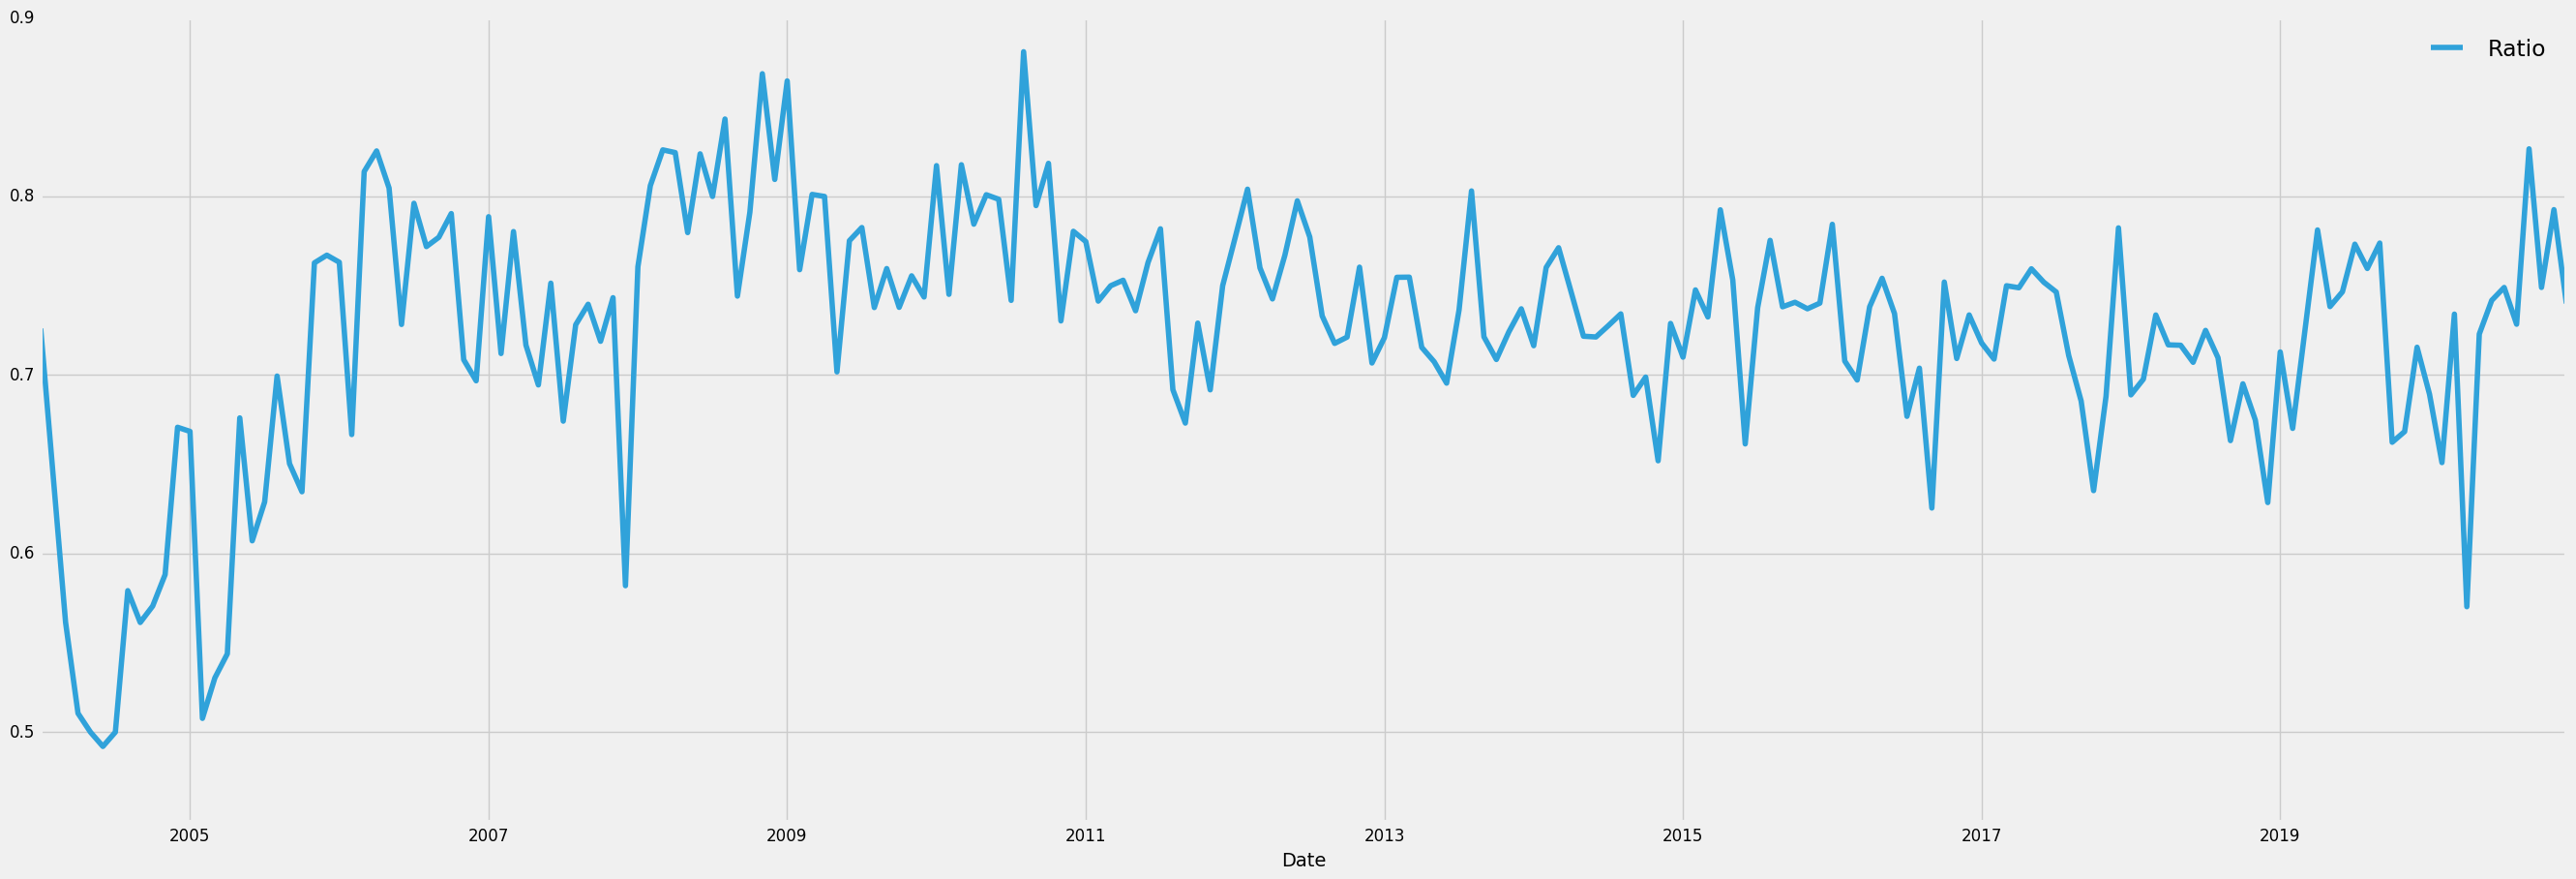

In [76]:
#Visualizing time series 1565 data
plt.show()

In [77]:
timeseries

,HospitalCityOR,Year,Month,Ratio,Date
0,ATL-EG l AGG,2004,1,0.726027,2004-01-01
1,ATL-EG l AGG,2004,2,0.643750,2004-02-01
2,ATL-EG l AGG,2004,3,0.561497,2004-03-01
3,ATL-EG l AGG,2004,4,0.510526,2004-04-01
4,ATL-EG l AGG,2004,5,0.500000,2004-05-01
5,ATL-EG l AGG,2004,6,0.491978,2004-06-01
6,ATL-EG l AGG,2004,7,0.500000,2004-07-01
7,ATL-EG l AGG,2004,8,0.579234,2004-08-01
8,ATL-EG l AGG,2004,9,0.561403,2004-09-01
9,ATL-EG l AGG,2004,10,0.570588,2004-10-01


In [80]:
timeseries2=timeseries.set_index('Date',inplace=False)

In [81]:
timeseries2

,HospitalCityOR,Year,Month,Ratio
Date,,,,
2004-01-01,ATL-EG l AGG,2004,1,0.726027
2004-02-01,ATL-EG l AGG,2004,2,0.643750
2004-03-01,ATL-EG l AGG,2004,3,0.561497
2004-04-01,ATL-EG l AGG,2004,4,0.510526
2004-05-01,ATL-EG l AGG,2004,5,0.500000
2004-06-01,ATL-EG l AGG,2004,6,0.491978
2004-07-01,ATL-EG l AGG,2004,7,0.500000
2004-08-01,ATL-EG l AGG,2004,8,0.579234
2004-09-01,ATL-EG l AGG,2004,9,0.561403


In [87]:
timeseries2


,HospitalCityOR,Year,Month,Ratio
Date,,,,
2004-01-01,ATL-EG l AGG,2004,1,0.726027
2004-02-01,ATL-EG l AGG,2004,2,0.643750
2004-03-01,ATL-EG l AGG,2004,3,0.561497
2004-04-01,ATL-EG l AGG,2004,4,0.510526
2004-05-01,ATL-EG l AGG,2004,5,0.500000
2004-06-01,ATL-EG l AGG,2004,6,0.491978
2004-07-01,ATL-EG l AGG,2004,7,0.500000
2004-08-01,ATL-EG l AGG,2004,8,0.579234
2004-09-01,ATL-EG l AGG,2004,9,0.561403


In [105]:
timeseries2.drop(['HospitalCityOR','Year','Month'], axis = 1,inplace = True)

ValueError: labels ['HospitalCityOR' 'Year' 'Month'] not contained in axis

In [106]:
timeseries2

,Ratio
Date,
2004-01-01,0.726027
2004-02-01,0.643750
2004-03-01,0.561497
2004-04-01,0.510526
2004-05-01,0.500000
2004-06-01,0.491978
2004-07-01,0.500000
2004-08-01,0.579234
2004-09-01,0.561403


In [104]:
timeseries2.plot(figsize=(30,10))

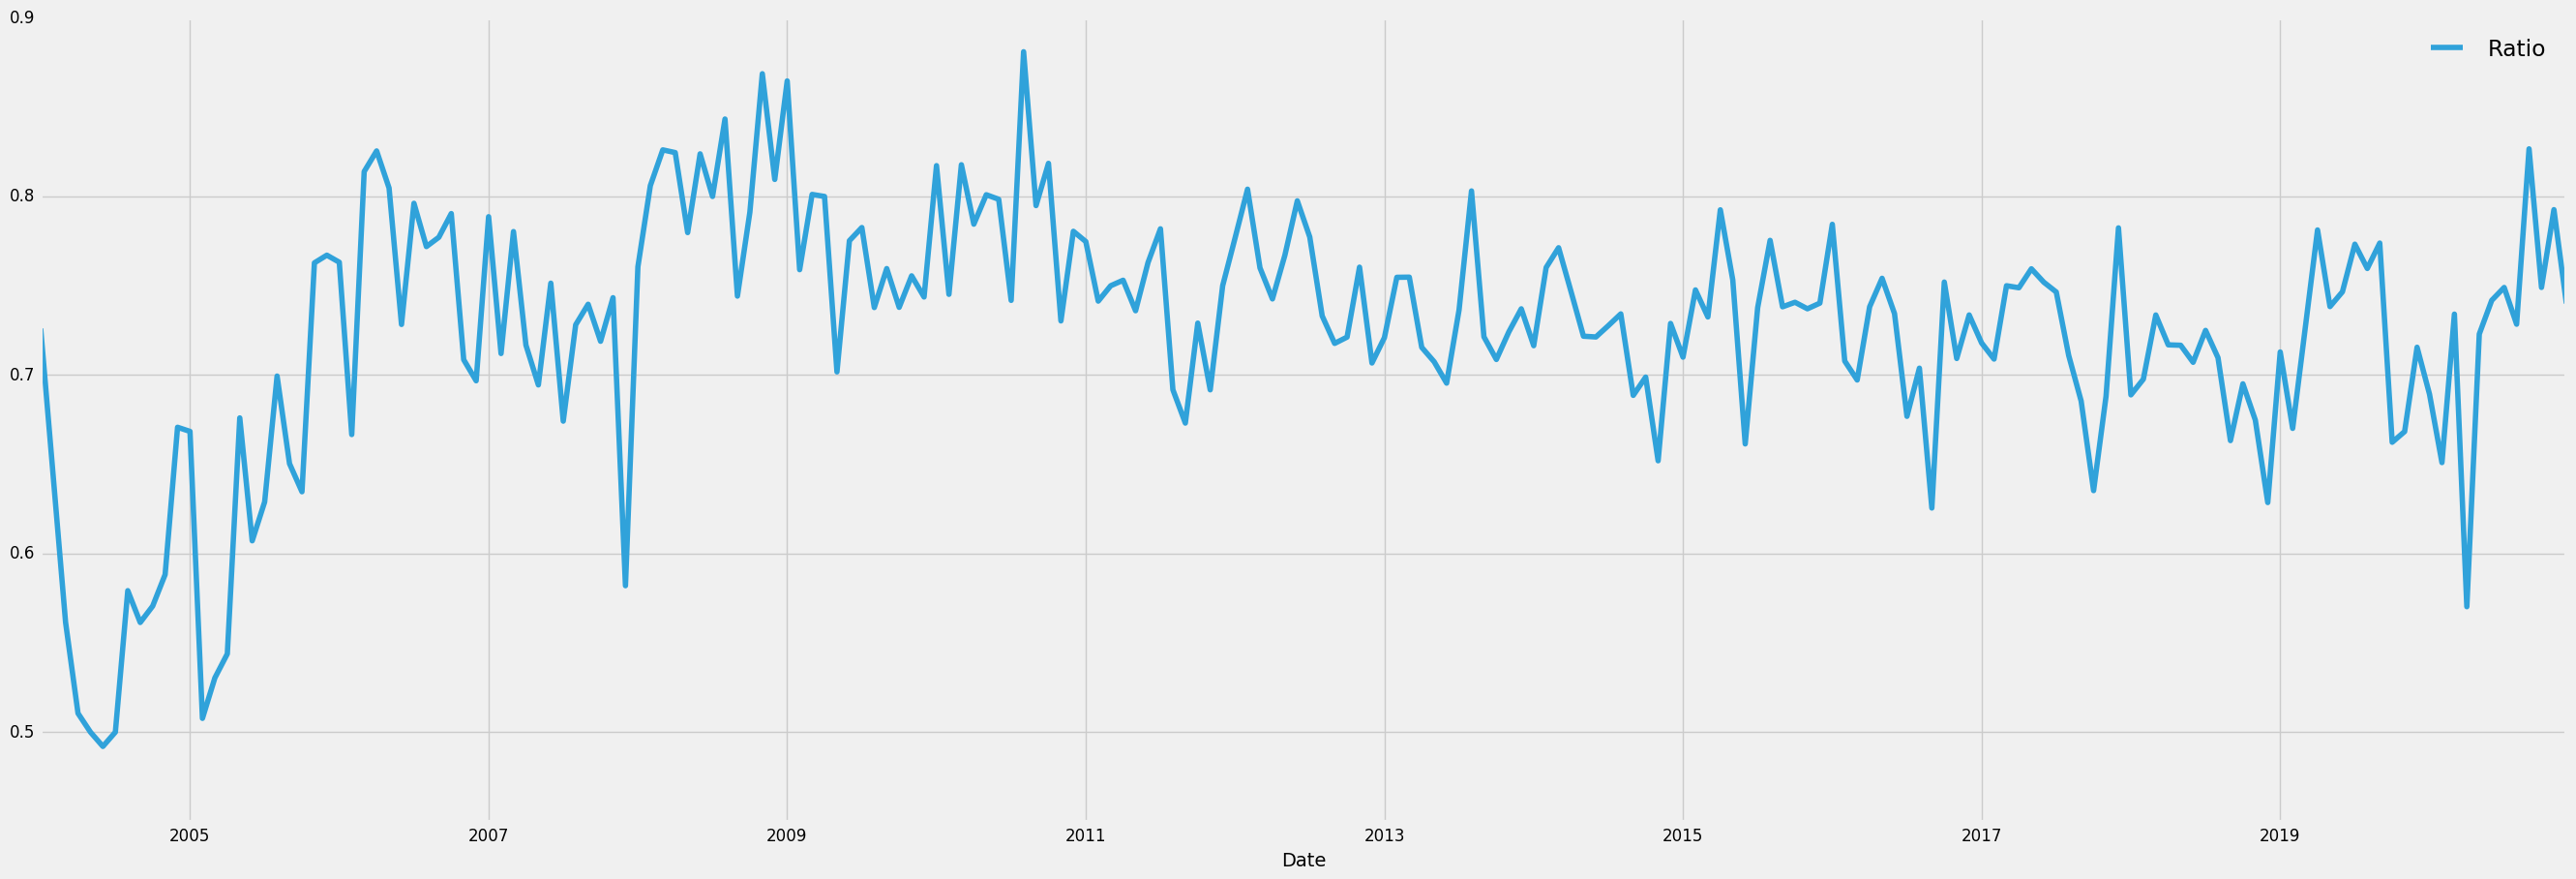

In [107]:
plt.show() #looks seasonal and non stationary

In [108]:
### Testing For Stationarity.Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

In [110]:
test_result=adfuller(timeseries2['Ratio'])

In [111]:
def adfuller_test(Ratio):
    result=adfuller(Ratio)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [112]:
adfuller_test(timeseries2['Ratio'])

ADF Test Statistic : -3.52772793991
p-value : 0.00730289144042
#Lags Used : 3
Number of Observations Used : 200
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# AR Model
Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

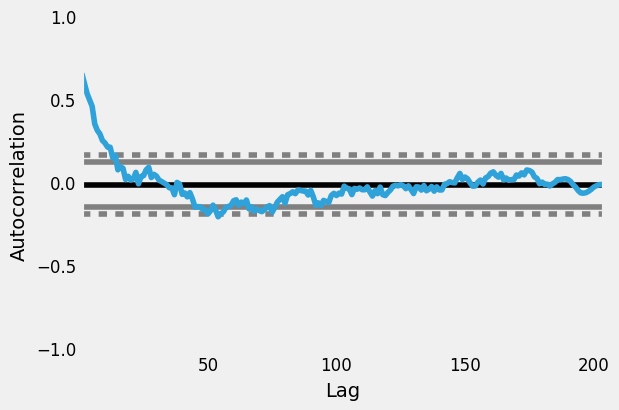

In [116]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(timeseries2['Ratio'])
plt.show()

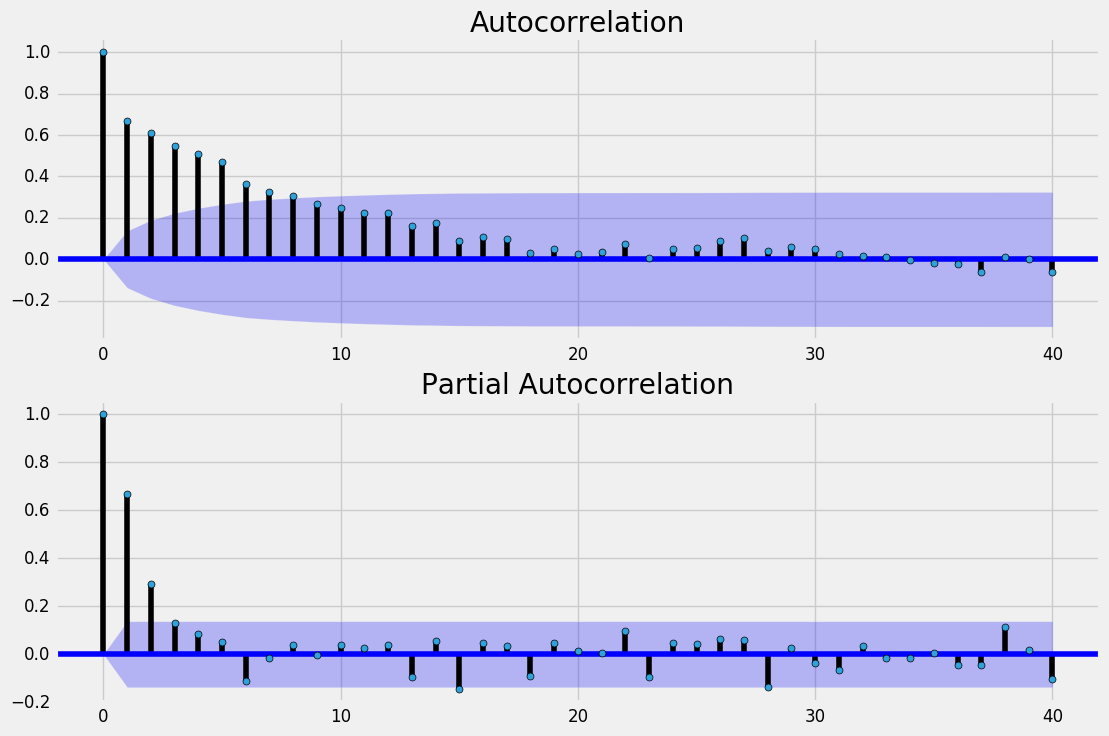

In [120]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(timeseries2['Ratio'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(timeseries2['Ratio'],lags=40,ax=ax2)
plt.show()